# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet nous allons calculer numériquement les forces appliquées à une digue de forme arbitraire.



## Introduction du problème

Nous allons modéliser la digue qui est donc un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur un sol rocheux ( avec un coefficient de friction statique béton - roche : 0.5). Nous avons d'un côté la digue qui retient une masse d'eau de hauteur $H$, l'autre côté étant exposé à l'air. On prendra $H=10$ m dans toute la suite. 

On se place en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

De plus on ne considérera que les forces de pressions dues à la hauteur d'eau (la pression de l'air étant négligée).



### Principe 

Nous allons introduire des notions, des expressions ainsi que des équations. "Le but étant de comprendre le problème".

Pour commencer, faisons un bilan des forces appliquées à la digue en 2D :

* Force gravitationnelle :  $F_{gravite}$ = $mg$, avec  $m$ qui est la masse de la digue et $g$ est l'accélération due à la gravité.
* Pression hydrostatique : $P_{eau}(x)$ = $\rho$*$g$*$x$, où $\rho$ est la masse volumique de l'eau, $g$ est l'accélération due à la gravité, et $x$ représente la profondeur de l'eau par rapport à la surface du sol.
* Force de frottement : $F_{frottement}$ = $µ$$N$, où $µ$ est le coefficient de friction statique entre le béton et la roche, et $N$ est la force normale exercée par le sol rocheux sur la digue.

On sait que la somme des forces qui agissent sur un système doit être égale à 0 pour que le système soit stable, qu'il soit immobile.

$$\sum F = 0$$

$$\sum F = F_{gravite} + F_{eau} + F_{frottement}$$

$$\sum F = mg + P_{eau}(x) + µN$$

$$\sum F = mg + \rho gx + µN$$


On peut se demander pourquoi la digue ne glisse pas ? La réponse est très simple, c'est uniquement grâce à la force de frottement entre la digue et le sol rocheux qui permet de compenser pression hydrostatique et la force gravitationnelle comme vous pouvez le voir ci-dessous.

$$mg + \rho gx = - µN$$

Nous savons que la pression hydrostatique $P_{eau}(x)$ est la multiplication de $\rho$*$g$*$x$ mais comme dit précédemment $x$ représente la profondeur de l'eau par rapport à la surface du sol. Dans ce cas précis, on peut alors écrire $$P_{eau}(H) = \rho g H$$

### Equation d'équilibre

Désormais, nous pouvons mettre en place les équations d'équilibre de la digue. Pour cela, nous allons faire la somme des forces selon l'axe horizontal et vertical. On sait que selon l'axe horizontal, nous avons une seule force.

$$\sum F_x = 0$$
$$µN=0$$


La somme des forces selon l'axe vertical est égale à zéro :
$$\sum F_y = 0$$
$$P_{eau}(H) - mg = 0 $$
$P_{eau}(H)$ est la pression hydrostatique en fonction de la hauteur $H$, $m$ est la masse de la digue, et $g$ est l'accélération due à la gravité.

### Modélisation

On souhaite modéliser les pentes côté air et côté eau par des fonctions mathématiques. Nous allons intégrer des fonctions suivant la direction donnée par l’axe vertical. On nous donne $fair(y)$ mais pas $feau(y)$. On suppose donc que $feau(y)$= $\frac{-(y - H)x_{e}}{H}$

On peut donc compléter le script qui nous est fournit et tracer les graphiques

In [2]:
import numpy as np # On importe les modules 
import matplotlib.pyplot as plt

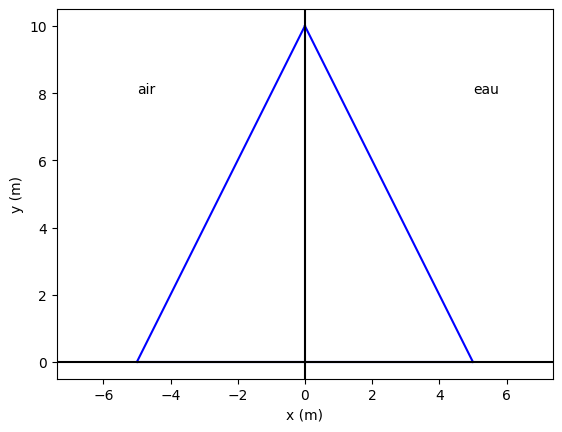

In [3]:
#On donne les données fournit

H = 10
xa = -5
xe = +5

# On définit les fonctions côté eau et côté air
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(-8, 8)
plt.show()


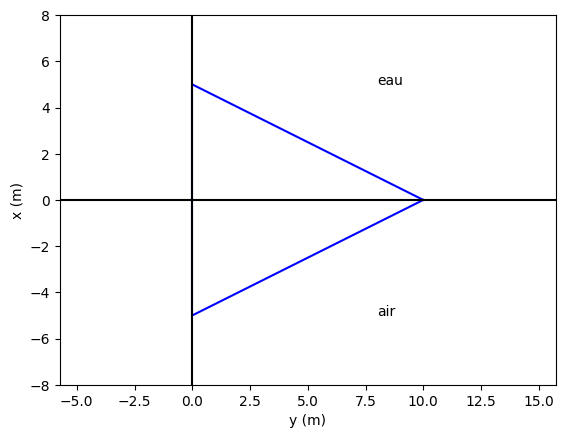

In [23]:
plt.plot(y, fair(y), '-b') # Axe y en abscisse
plt.plot(y, feau(y), '-b') # Axe y en abscisse

plt.plot([0, 0], [xe, xa], '-b') # Bas de la digue
plt.xlabel('y (m)') 
plt.ylabel('x (m)')
plt.text(8, xe, 'eau')
plt.text(8, xa, 'air')
plt.axis('equal')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.ylim(-8, 8)
plt.show()


### Cas des digues en pentes droites

Nous allons calculer le volume de la digue dans le cas où nous avons des pentes droites. Ensuite, on en déduira la force de gravité exercée sur la digue. On met en place un code

In [54]:
import numpy as np

# Définition des paramètres
H = 10
xa = -5
xe = 5

# Définition des fonctions de la digue
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return -(y - H) * xe / H

# Calcul de la largeur de la digue en fonction de y
def largeur_digue(y):
    return feau(y) - fair(y)

# Calcul du volume de la digue par intégration
y_values = np.linspace(0, H, 1000)  # Discrétisation de l'intervalle de la hauteur de la digue
volume_digue = np.trapz(largeur_digue(y_values), y_values)

print("Volume de la digue par intégration en fonction de y: ", volume_digue,'m³ ')
# Calcul analytique de l'aire du triangle multipliée par la longueur L=1
aire_triangle = (abs(xa - xe) * H)/2
aire_totale = aire_triangle * 1

print("Aire analytique du triangle: ", aire_triangle,'m²')
print("Volume attendu: ", aire_totale,'m³')



Volume de la digue par intégration en fonction de y:  50.0 m³ 
Aire analytique du triangle:  50.0 m²
Volume attendu:  50.0 m³


On vient de trouver le volume de la digue par intégration en utilisant la méthode des trapèzes en fonction de y. Nous pouvons donc calculer la force de gravité subit par la digue.

In [41]:
# On sait que rho = 3000 kg/m^3
rho = 3000  # kg/m^3
g = 9.81  # m/s^2
volume = 50 #m^3
# Calcul de la masse
masse = rho * volume

# Calcul de la force de gravité
force_gravite = masse * g

print("Force de gravité exercée sur la digue :", force_gravite, "N")


Force de gravité exercée sur la digue : 1471500.0 N


Nous avons la possibilité de calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. 

In [43]:
# Définition des constantes
rho = 1000  # Masse volumique de l'eau en kg/m^3
g = 9.81  # Accélération due à la gravité en m/s^2
xa = -5
xe = 5
H = 10

# Nombre de points pour l'évaluation
num_points = 1000

# Points le long de la digue
x_v = np.linspace(xa, xe, num_points)
y_v = np.linspace(0, H, num_points)

# Calcul des forces de pression côté eau pour chaque point
force_x = rho * g * x_v
force_y = rho * g * y_v

# Somme des composantes pour obtenir la résultante pour 1000 points
resultante_x = np.sum(force_x)
resultante_y = np.sum(force_y)

print("Résultante des forces de pression côté eau (composante x) :", resultante_x, "N")
print("Résultante des forces de pression côté eau (composante y) :", resultante_y, "N")


Résultante des forces de pression côté eau (composante x) : 1.862645149230957e-09 N
Résultante des forces de pression côté eau (composante y) : 49050000.00000001 N


Nous pouvons aussi calculer les composantes (normale et tangentielle) de la force de réaction du sol en utilisant le principe fondamental de la dynamique dans le cas où la digue est en équilibre statique translationnel. 

Selon le principe fondamental de la dynamique, la somme des forces agissant sur un objet est égale à sa masse multipliée par son accélération. Dans ce cas, puisque la digue est en équilibre statique, la somme des forces est nulle.

Comme nous l'avons précédemment défini, les forces appliquées à la digue sont :

- $F_{gravité}$ : la force gravitationnelle exercée sur la digue.
- $F_{eau}$ : la force exercée par l'eau sur la digue.
- $F_{frottement}$ : la force de frottement entre la digue et le sol rocheux.

Les forces de réaction du sol ont une composante normale $N$ et une composante tangentielle $T$.

Puisque la digue est en équilibre statique translationnel, la somme des forces horizontales et verticales doit être nulle.

Somme des forces horizontales :
$$T - F_{frottement} = 0$$

Somme des forces verticales :
$$N - F_{gravité} - F_{eau} = 0$$

Nous pouvons ensuite définir $$T=  F_{frottement}$$
$$N = F_{gravité} + F_{eau}$$

Si le rapport entre $T$ et $N$ est infèrieur à 0.5, le coefficient de friction statique béton - roche, cela revient à admettre que la digue est en équilibre translationnel. A l'inerse, si $T/N>0.5$,la digue ne serait pas en équilibre translationnel. On peut traduire la situation à travers le script suivant

In [47]:
# coefficient de frottement statique
fs=0.5

# Composantes des forces
F_gravite = force_gravite
F_eau = 0  # On néglige la force exercée par l'eau sur la digue pour simplifié le problème
F_frottement = fs * force_gravite  

# Calcul des composantes des forces de réaction du sol
N = F_gravite + F_eau
T = F_frottement

# Calcul du rapport T/N
rapport_T_N = T / N

print("Composante normale de la force de réaction du sol (N) :", N, "N")
print("Composante tangentielle de la force de réaction du sol (T) :", T, "N")
print("Rapport T/N :", rapport_T_N)

if rapport_T_N <= mu:
    print("La digue est en équilibre translationnel.")
else:
    print("La digue n'est pas en équilibre translationnel.")


Composante normale de la force de réaction du sol (N) : 1471500.0 N
Composante tangentielle de la force de réaction du sol (T) : 735750.0 N
Rapport T/N : 0.5
La digue est en équilibre translationnel.


Si on reprend les calculs du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$, on peut se demander si la digue sera toujours en équilibre translationnel. On change donc les valeurs

In [57]:
# Paramètres de la digue
masse_volumique = 3000  # kg/m^3
g = 9.81  # m/s^2
xa = -5
xe = 0
H = 10

def calcul_digue(masse_volumique, g, xa, xe, H):
    # Calcul du volume de la digue
    volume_digue = np.trapz(largeur_digue(y_values), y_values)
  
    # Calcul de la résultante des forces de pression côté eau
    force_resultante_x = 0.5 * masse_volumique * g * (xe**2 - xa**2)
    force_resultante_y = 0.5 * masse_volumique * g * H**2

    # Calcul du rapport T/N
    T_N_ratio = (masse_volumique * g * (xe - xa)) / (masse_volumique * g * H)

    # Vérification de l'équilibre translationnel
    fs = 0.5  # Coefficient de frottement statique
    if T_N_ratio <= mu:
        equilibre_translationnel = True
    else:
        equilibre_translationnel = False

    return volume, (force_resultante_x, force_resultante_y), T_N_ratio, equilibre_translationnel


# Calcul des paramètres de la digue
volume, force_resultante, T_N_ratio, equilibre_translationnel = calcul_digue(masse_volumique, g, xa, xe, H)

# Affichage des résultats
print("Volume de la digue :", volume, "m^3")
print("Résultante des forces de pression côté eau (composante x) :", force_resultante[0], "N")
print("Résultante des forces de pression côté eau (composante y) :", force_resultante[1], "N")
print("Rapport T/N :", T_N_ratio)

if equilibre_translationnel:
    print("La digue est en équilibre translationnel.")
else:
    print("La digue n'est pas en équilibre translationnel.")


Volume de la digue : 50 m^3
Résultante des forces de pression côté eau (composante x) : -367875.0 N
Résultante des forces de pression côté eau (composante y) : 1471500.0 N
Rapport T/N : 0.5
La digue est en équilibre translationnel.


On peut aussi essayer de reprendre le calcul avec $x_a=0$ et $x_e=+5$.


In [62]:
# Paramètres de la digue
masse_volumique = 3000  # kg/m^3
g = 9.81  # m/s^2
xa = 0
xe = 5
H = 10

def calcul_digue(masse_volumique, g, xa, xe, H):
    # Calcul du volume de la digue
    volume_digue = np.trapz(largeur_digue(y_values), y_values)
    
    # Calcul de la résultante des forces de pression côté eau
    force_resultante_x = 0.5 * masse_volumique * g * (xe**2 - xa**2)
    force_resultante_y = 0.5 * masse_volumique * g * H**2

    # Calcul du rapport T/N
    T_N_ratio = (masse_volumique * g * (xe - xa)) / (masse_volumique * g * H)

    # Vérification de l'équilibre translationnel
    fs = 0.5  # Coefficient de frottement statique
    if T_N_ratio <= mu:
        equilibre_translationnel = True
    else:
        equilibre_translationnel = False

    return volume, (force_resultante_x, force_resultante_y), T_N_ratio, equilibre_translationnel


# Calcul des paramètres de la digue
volume, force_resultante, T_N_ratio, equilibre_translationnel = calcul_digue(masse_volumique, g, xa, xe, H)

# Affichage des résultats
print("Volume de la digue :", volume, "m³ ")
print("Résultante des forces de pression côté eau (composante x) :", force_resultante[0], "N")
print("Résultante des forces de pression côté eau (composante y) :", force_resultante[1], "N")
print("Rapport T/N :", T_N_ratio)

if equilibre_translationnel:
    print("La digue est en équilibre translationnel.")
else:
    print("La digue n'est pas en équilibre translationnel.")


Volume de la digue : 50 m³ 
Résultante des forces de pression côté eau (composante x) : 367875.0 N
Résultante des forces de pression côté eau (composante y) : 1471500.0 N
Rapport T/N : 0.5
La digue est en équilibre translationnel.


On observe alors observons un changement significatif dans la stabilité de la digue par rapport à la configuration précédente. Dans cette nouvelle disposition, la partie immergée de la digue se situe du côté gauche (vers  $x_a$ = 0 ) tandis que la partie émergée se trouve du côté droit (vers $x_e$ = 5).

Dans cette configuration, la digue est stable. La raison en est que la résultante des forces de pression côté eau est dirigée vers le haut et vers la gauche, exerçant ainsi une force stabilisatrice sur la digue. En d'autres termes, les forces de pression côté eau agissent dans le sens opposé à tout mouvement potentiel de la digue, ce qui contribue à maintenir sa stabilité.

En revanche, dans la configuration précédente avec ( $x_a$ = -5) et ( $x_e$ = 0), la résultante des forces de pression côté eau était dirigée vers la droite, ce qui créait une force déséquilibrante sur la digue et la rendait instable.

En résumé, la stabilité de la digue dépend de la direction de la résultante des forces de pression côté eau par rapport à la position de la digue. Si cette résultante exerce une force stabilisatrice, la digue sera stable ; sinon, elle sera instable.

## Cas des digues convexes

Désormais, on considère que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


avec comme dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

Nous allons calculer, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique.

In [75]:
def calcul_digue_convexe(a, masse_volumique, g, xa, xe, H):
    # Calcul du volume de la digue
    volume = H * (xe - xa) 

    # Calcul de la résultante des forces de pression côté eau
    force_resultante_x = 0.5 * masse_volumique * g * (xe**2 - xa**2)
    force_resultante_y = (1/3) * a * H**3 - (a + xe) * (0.5 * H)**2 + xe * H

    # Calcul du rapport T/N
    T_N_ratio = (masse_volumique * g * (xe - xa)) / (masse_volumique * g * H)

    # Vérification de l'équilibre translationnel
    mu = 0.5  # Coefficient de frottement statique
    if T_N_ratio <= mu:
        equilibre_translationnel = True
    else:
        equilibre_translationnel = False

    return volume, (force_resultante_x, force_resultante_y), T_N_ratio, equilibre_translationnel

# Paramètres de la digue convexe
a = 3
masse_volumique = 3000  # kg/m^3
g = 9.81  # m/s^2
xa = 0
xe = 5
H = 10

# Calcul des paramètres de la digue convexe
volume, force_resultante, T_N_ratio, equilibre_translationnel = calcul_digue_convexe(a, masse_volumique, g, xa, xe, H)

# Affichage des résultats
print("Volume de la digue convexe :", volume, "m^3")
print("Résultante des forces de pression côté eau (composante x) :", force_resultante[0], "N")
print("Résultante des forces de pression côté eau (composante y) :", force_resultante[1], "N")
print("Rapport T/N :", T_N_ratio)

if equilibre_translationnel:
    print("La digue convexe est en équilibre translationnel.")
else:
    print("La digue convexe n'est pas en équilibre translationnel.")


Volume de la digue convexe : 50 m^3
Résultante des forces de pression côté eau (composante x) : 367875.0 N
Résultante des forces de pression côté eau (composante y) : 850.0 N
Rapport T/N : 0.5
La digue convexe est en équilibre translationnel.


On peut se demander ce qu'il se passerait si on reprenait le calcul avec $x_e=6$. La digue serait elle en équilibre ? 

In [64]:
# Paramètres de la digue convexe pour x_e = 6
xe_6 = 6

# Calcul des paramètres de la digue convexe pour x_e = 6
volume_6, _, _, equilibre_translationnel_6 = calcul_digue_convexe(a, masse_volumique, g, xa, xe_6, H)

# Affichage du résultat pour x_e = 6
if equilibre_translationnel_6:
    print("Pour xe = 6, la digue convexe est en équilibre translationnel.")
else:
    print("Pour xe = 6, la digue convexe n'est pas en équilibre translationnel.")

# Comparaison avec la situation pour la pente affine avec xa = 0 et xe = 5
if equilibre_translationnel:
    print("Pour la pente affine avec xa = 0 et xe = 5, la digue est en équilibre translationnel.")
else:
    print("Pour la pente affine avec xa = 0 et xe = 5, la digue n'est pas en équilibre translationnel.")


Pour xe = 6, la digue convexe n'est pas en équilibre translationnel.
Pour la pente affine avec xa = 0 et xe = 5, la digue est en équilibre translationnel.


On préfère alors la pente affine avec $x_a$=0 et $x_e$=5. On souhaite utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume et déterminer graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5. 

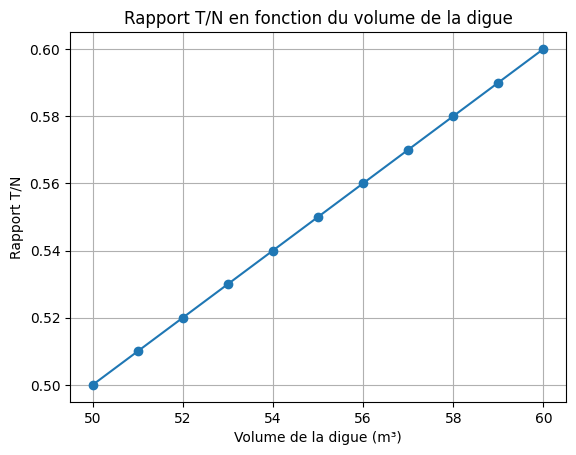

Le volume minimal pour garder le rapport T/N inférieur à 0.5 est de 50.0 m^3.


In [77]:
import matplotlib.pyplot as plt

# Intervalles pour xe
xe_values = np.arange(5, 6.1, 0.1)

# Listes pour stocker les volumes et les rapports T/N
volumes = []
T_N_ratios = []

# Calcul du volume et du rapport T/N pour chaque valeur de xe
for xe in xe_values:
    volume, _, T_N_ratio, _ = calcul_digue_convexe(a, masse_volumique, g, xa, xe, H)
    volumes.append(volume)
    T_N_ratios.append(T_N_ratio)

# Tracer le rapport T/N en fonction du volume
plt.plot(volumes, T_N_ratios, marker='o')
plt.xlabel('Volume de la digue (m³)')
plt.ylabel('Rapport T/N')
plt.title('Rapport T/N en fonction du volume de la digue')
plt.grid(True)
plt.show()

# Identification graphique du volume minimal pour maintenir le rapport T/N inférieur à 0.5
if T_N_ratios:
    volume_minimal = volumes[T_N_ratios.index(min(T_N_ratios))]
    print(f"Le volume minimal pour garder le rapport T/N inférieur à 0.5 est de {volume_minimal} m^3.")
else:
    print("Aucun rapport T/N inférieur à 0.5 n'a été trouvé.")

Même si nous n'avons pas obtenu une forme courbe de l'interface entre l'eau et le béton, on peut émettre des idées. Cela peut aider à réduire le volume de béton nécessaire pour maintenir la digue en équilibre pour plusieurs raisons :

- Avec une forme courbe, on a moins de variations brusques de pression et moins de points de concentration de force, alors cela permet de stabiliser la digue avec moins de matériau.

- La forme courbe peut réduire les forces de frottement exercées par l'eau sur la digue. Avec une surface courbe, il y a moins de points de contact direct entre l'eau et la digue par rapport à une surface plane. Cela peut réduire les forces de frottement qui s'opposent au mouvement de la digue.

- Une forme courbe peut permettre une utilisation plus efficace de la résistance structurelle du matériau de la digue. En utilisant la forme courbe pour distribuer les charges et les contraintes de manière optimale, il est possible de concevoir une digue qui utilise moins de matériau tout en restant stable.

## Conclusion

On a donc réussi à déterminer les forces s'appliquant sur la digue et a modélisé deux situations différentes pour pouvoir comprendre quels sont les facteurs qui pouvait avoir une influence sur l'état d'équilibre translationnel. On a pu calculé le volume de la digue et on a constaté que la position de $x_a$ et de $x_e$ avait une très influence mais aussi la force de frottement qui a un rôle important. On se devait d'avoir un rapport T/N infèrieur au coefficient de friction statique béton - roche qui était de 0.5, ce qui garrantissait l'équilibre de la digue, en fonction des forces et des  valeurs de x, on pouvait avoir des forces qui changeant de valeurs et donc avoir un rapport T/N qui changeait et qui pouvait être supèrieur à 0.5. Ce qui revenait à ne plus être dans cet état d'quilibre translationnel